In [1]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
from scipy.stats import qmc

In [2]:
# Given parameters
nx = 60
ny = 60
tf = 5.0
dt = 1.0e-2
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1
dims=(nx,ny)

# POD basis
num_basis=np.array([3,4,5,6])
print('num_basis {}'.format(num_basis))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_uniform_result = "../__result/ex23_wave/ex23_POD_bndry_uniform_gappy_result.p"
file_name_SVD="../__model/ex23_wave/ex23_SVD.p"

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

num_basis [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


# gappyPOD

# of measurments: 12
[   0   20   40   59 1200 1259 2400 2459 3540 3560 3580 3599]


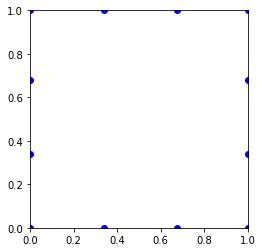

In [3]:
# equally spaced on bc
inter=20
x0_inter_multi_index=(multi_index_j[::inter,0].flatten(),multi_index_i[::inter,0].flatten())
x1_inter_multi_index=(multi_index_j[::inter,-1].flatten(),multi_index_i[::inter,-1].flatten())
y0_inter_multi_index=(multi_index_j[0,::inter].flatten(),multi_index_i[0,::inter].flatten())
y1_inter_multi_index=(multi_index_j[-1,::inter].flatten(),multi_index_i[-1,::inter].flatten())
x0_inter_raveled_indicies=np.ravel_multi_index(x0_inter_multi_index,dims)
x1_inter_raveled_indicies=np.ravel_multi_index(x1_inter_multi_index,dims)
y0_inter_raveled_indicies=np.ravel_multi_index(y0_inter_multi_index,dims)
y1_inter_raveled_indicies=np.ravel_multi_index(y1_inter_multi_index,dims)
msmt_idx=np.unique(np.concatenate((x0_inter_raveled_indicies,
                                   x1_inter_raveled_indicies,
                                   y0_inter_raveled_indicies,
                                   y1_inter_raveled_indicies,
                                  np.array([nx*ny-1]))))

print("# of measurments: {}".format(len(msmt_idx)))
print(msmt_idx)

# plot measuremnt positions
plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
plt.axis('square')
plt.axis([xmin,xmax,ymin,ymax])
plt.savefig("../__result/ex23_wave/ex23_POD_bndry_uniform_{}_samples.png".format(len(msmt_idx)))

# of POD basis is 3
# of measurments: 12
[   0   20   40   59 1200 1259 2400 2459 3540 3560 3580 3599]


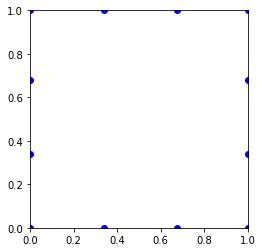

Param is 75
Time elapsed: 6.271762847900391 sec
average relative error of u: 5.034737963805595%
maximum relative error of u: 6.474563829462297%

Param is 76
Time elapsed: 3.929870367050171 sec
average relative error of u: 4.817745445370488%
maximum relative error of u: 6.26795148693588%

Param is 77
Time elapsed: 1.1770706176757812 sec
average relative error of u: 4.619863504904384%
maximum relative error of u: 6.074434852567301%

Param is 78
Time elapsed: 1.1847193241119385 sec
average relative error of u: 4.445039045237677%
maximum relative error of u: 5.897046306633694%

Param is 79
Time elapsed: 1.147289752960205 sec
average relative error of u: 4.297544873346029%
maximum relative error of u: 5.742695878705489%

Param is 80
Time elapsed: 1.0907862186431885 sec
average relative error of u: 4.181640166631901%
maximum relative error of u: 5.607675046461249%

Param is 81
Time elapsed: 0.988940954208374 sec
average relative error of u: 4.101379145450199%
maximum relative error of u: 5.4

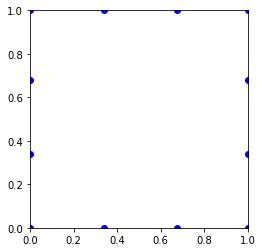

Param is 75
Time elapsed: 1.106856107711792 sec
average relative error of u: 4.591313874419937%
maximum relative error of u: 6.059253397178382%

Param is 76
Time elapsed: 1.1166229248046875 sec
average relative error of u: 4.4792515772277355%
maximum relative error of u: 5.963850980787614%

Param is 77
Time elapsed: 3.8970255851745605 sec
average relative error of u: 4.374420676241051%
maximum relative error of u: 5.8696036898605675%

Param is 78
Time elapsed: 1.5029194355010986 sec
average relative error of u: 4.278157696604287%
maximum relative error of u: 5.776501297413407%

Param is 79
Time elapsed: 3.2663657665252686 sec
average relative error of u: 4.191963552647138%
maximum relative error of u: 5.684760395966281%

Param is 80
Time elapsed: 0.7445604801177979 sec
average relative error of u: 4.117270327609095%
maximum relative error of u: 5.59446661342132%

Param is 81
Time elapsed: 0.7409927845001221 sec
average relative error of u: 4.055541939635083%
maximum relative error of u

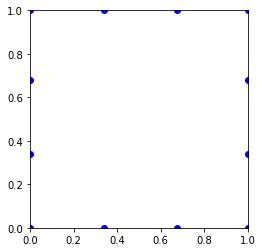

Param is 75
Time elapsed: 1.5720252990722656 sec
average relative error of u: 4.827868910533336%
maximum relative error of u: 6.731532497610848%

Param is 76
Time elapsed: 1.3134865760803223 sec
average relative error of u: 4.7581149574418955%
maximum relative error of u: 6.643941882288369%

Param is 77
Time elapsed: 5.210165739059448 sec
average relative error of u: 4.688388197233818%
maximum relative error of u: 6.555912662839225%

Param is 78
Time elapsed: 2.8033812046051025 sec
average relative error of u: 4.618766894254736%
maximum relative error of u: 6.467384385291681%

Param is 79
Time elapsed: 1.1543521881103516 sec
average relative error of u: 4.549295054751269%
maximum relative error of u: 6.3784739031386035%

Param is 80
Time elapsed: 1.1760175228118896 sec
average relative error of u: 4.480049477691779%
maximum relative error of u: 6.289334431215771%

Param is 81
Time elapsed: 7.052794933319092 sec
average relative error of u: 4.4110980060126295%
maximum relative error of 

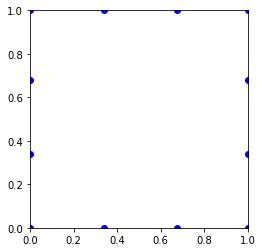

Param is 75
Time elapsed: 3.7599432468414307 sec
average relative error of u: 3.473862560744747%
maximum relative error of u: 4.735515607618441%

Param is 76
Time elapsed: 1.3451001644134521 sec
average relative error of u: 3.431205110132712%
maximum relative error of u: 4.674382088978241%

Param is 77
Time elapsed: 1.548888921737671 sec
average relative error of u: 3.388145430213204%
maximum relative error of u: 4.612761337917997%

Param is 78
Time elapsed: 1.897019386291504 sec
average relative error of u: 3.344714678917386%
maximum relative error of u: 4.550896888812162%

Param is 79
Time elapsed: 9.056985855102539 sec
average relative error of u: 3.3009299567011623%
maximum relative error of u: 4.4886896384762665%

Param is 80
Time elapsed: 1.2065396308898926 sec
average relative error of u: 3.2568145838403595%
maximum relative error of u: 4.4262966766270635%

Param is 81
Time elapsed: 1.0304405689239502 sec
average relative error of u: 3.212405116759334%
maximum relative error of 

In [4]:
solution=np.zeros((len(num_basis),len(FOM_parameters),nt+1,nx*ny))
avg_rel_err=np.zeros((len(num_basis),len(FOM_parameters)))
rel_err=np.zeros((len(num_basis),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(num_basis),len(FOM_parameters)))

with open(file=file_name_SVD, mode='rb') as ff:  
    SVD = pickle.load(ff)

for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    print("# of POD basis is {}".format(POD_basis))
    
    # num_msmt = 25
    # sampler = qmc.LatinHypercube(d=2,seed=0)
    # sample=sampler.integers(l_bounds=[1, 1], u_bounds=[ny-1,nx-1], n=num_msmt, endpoint=False)
    # msmt_idx=np.sort(np.ravel_multi_index((sample[:,0],sample[:,1]),dims))

    # equally spaced
    # dist_step = 11
    # dims=(ny,nx)
    # msmt_i,msmt_j=np.meshgrid(np.arange(1,nx-1,dist_step),np.arange(1,ny-1,dist_step),indexing='xy')
    # msmt_idx = np.sort(np.ravel_multi_index((msmt_j.flatten(),msmt_i.flatten()),dims))

    # equally spaced on bc
    inter=20
    x0_inter_multi_index=(multi_index_j[::inter,0].flatten(),multi_index_i[::inter,0].flatten())
    x1_inter_multi_index=(multi_index_j[::inter,-1].flatten(),multi_index_i[::inter,-1].flatten())
    y0_inter_multi_index=(multi_index_j[0,::inter].flatten(),multi_index_i[0,::inter].flatten())
    y1_inter_multi_index=(multi_index_j[-1,::inter].flatten(),multi_index_i[-1,::inter].flatten())
    x0_inter_raveled_indicies=np.ravel_multi_index(x0_inter_multi_index,dims)
    x1_inter_raveled_indicies=np.ravel_multi_index(x1_inter_multi_index,dims)
    y0_inter_raveled_indicies=np.ravel_multi_index(y0_inter_multi_index,dims)
    y1_inter_raveled_indicies=np.ravel_multi_index(y1_inter_multi_index,dims)
    msmt_idx=np.unique(np.concatenate((x0_inter_raveled_indicies,
                                       x1_inter_raveled_indicies,
                                       y0_inter_raveled_indicies,
                                       y1_inter_raveled_indicies,
                                      np.array([nx*ny-1]))))

    print("# of measurments: {}".format(len(msmt_idx)))
    print(msmt_idx)

    # plot measuremnt positions
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.show()
    
    # Basis matrix
    phi_u = SVD['U'][:,:POD_basis]

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex23_wave/ex23_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))
        print()

        # save result
        solution[ii,jj]=u_gappyPOD
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyPOD
        elapsed_time[ii,jj]=t_elapsed_gappyPOD
    
results={'solution':solution,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_uniform_result, mode='wb') as ff:
    pickle.dump(results, ff)

In [5]:
print(num_basis)
idx=[0,1,2,3]
num_basis[idx]

[3 4 5 6]


array([3, 4, 5, 6])

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

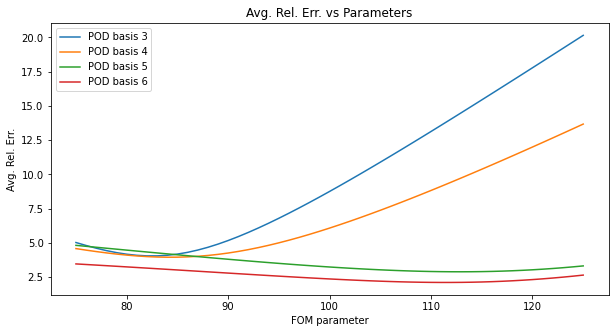

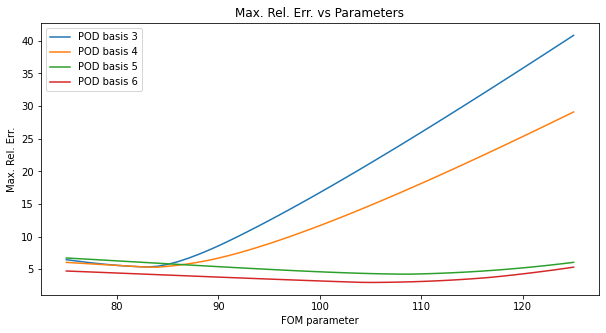

In [6]:
# with open(file=file_path_gappy_uniform_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_bndry_uniform_avg_rel_err.png")

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_bndry_uniform_max_rel_err.png")

In [7]:
idx=[3]
num_basis[idx]

array([6])

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

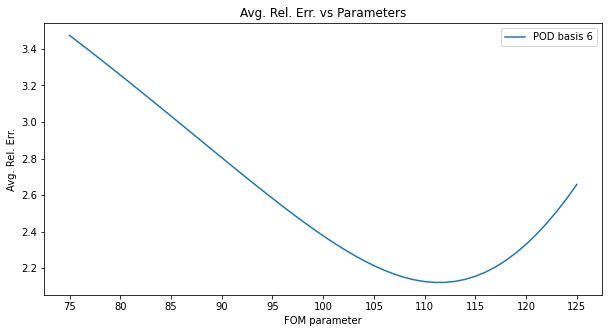

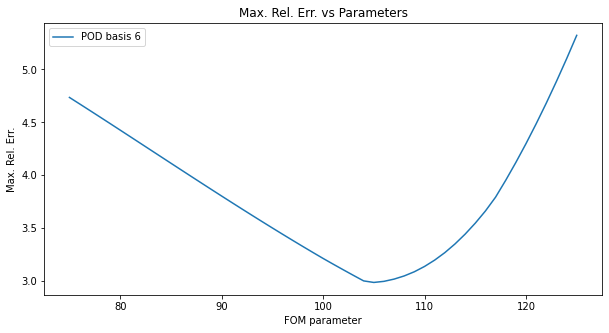

In [8]:
# with open(file=file_path_gappy_uniform_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_bndry_uniform_avg_rel_err.png".format(int(num_basis[idx])))

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_bndry_uniform_max_rel_err.png".format(int(num_basis[idx])))

In [9]:
print(num_basis)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


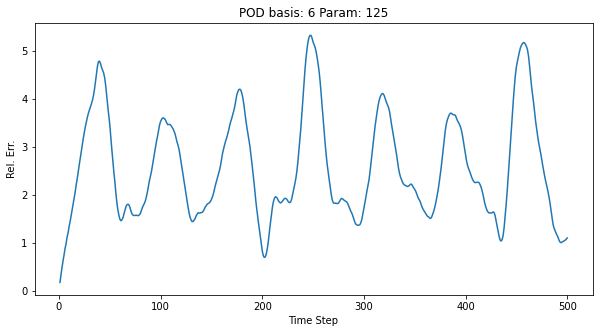

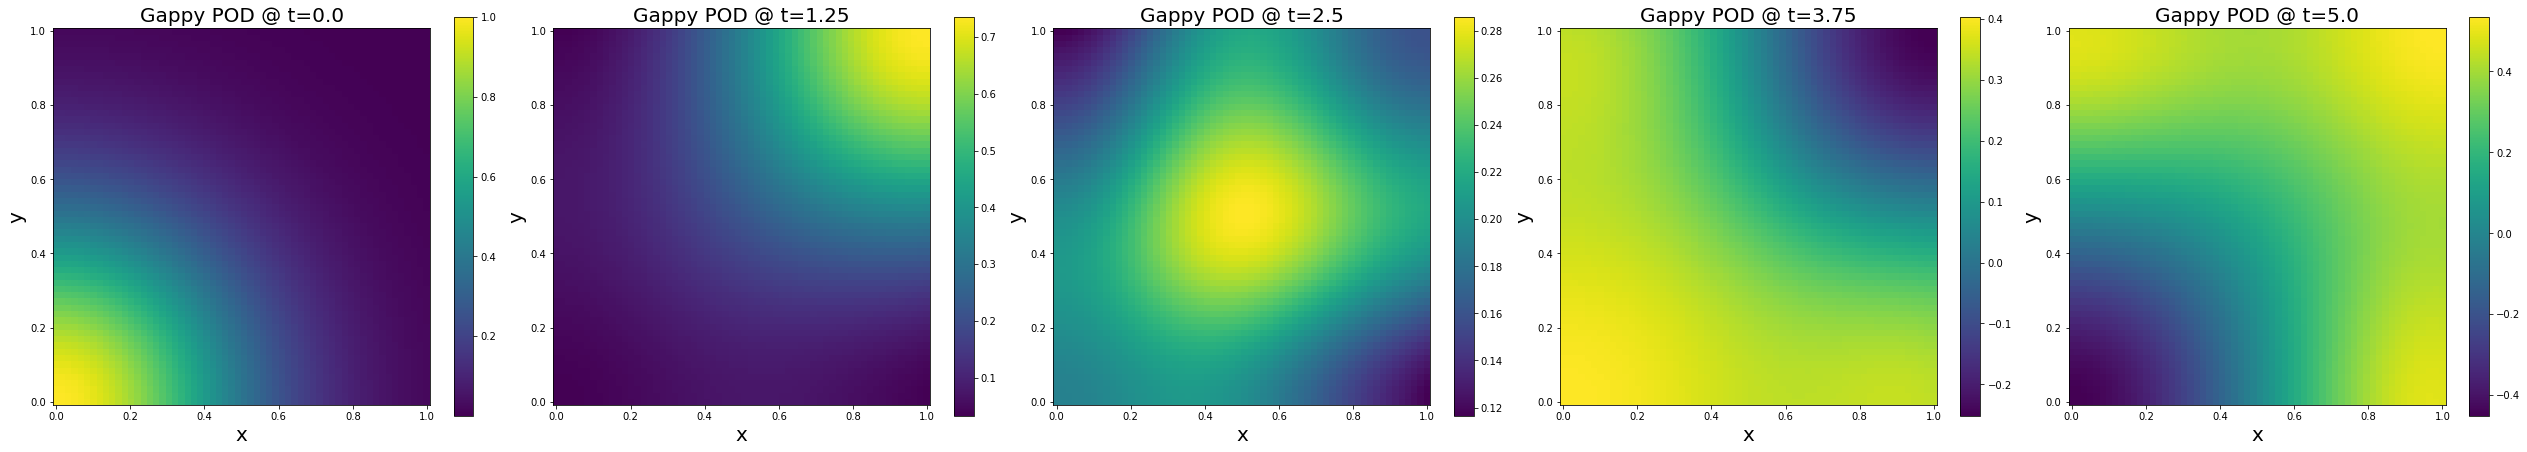

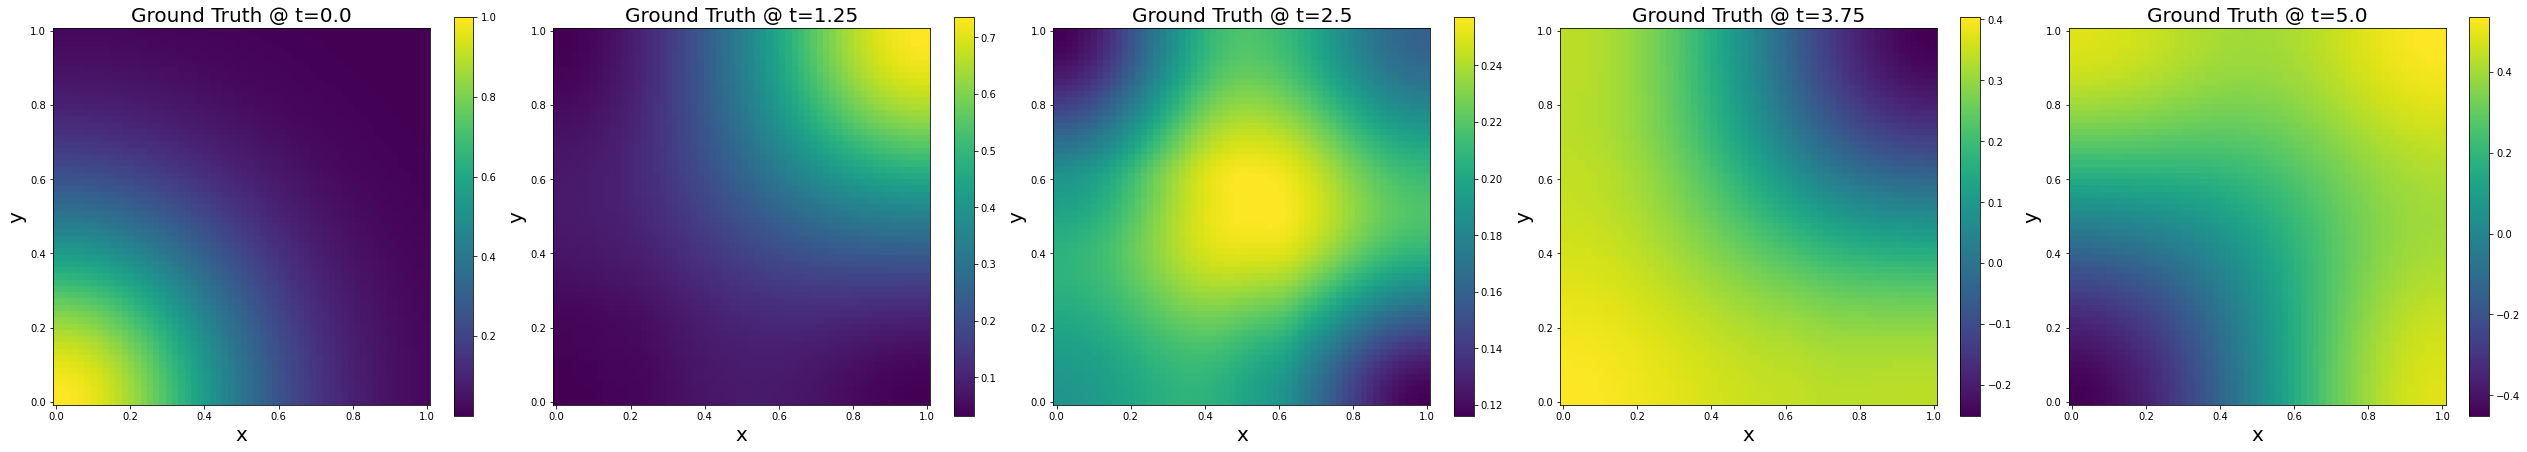

In [10]:
# figure rel.err vs at given param and POD basis
i=3;j=-1
POD_basis=num_basis[i]                 
param=FOM_parameters[j]

u_gappyPOD=results['solution'][i,j]

ex = np.load('../__data/ex23_wave/ex23_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("POD basis: {} Param: {}".format(POD_basis,param))
plt.show()

# plot original data
vmin=-1; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx))#,vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)
    fig.colorbar(pcm, ax=ax,shrink=0.8)

# fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_param_{}_bndry_uniform_SOL.png".format(POD_basis,param))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx))#,vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)
    fig.colorbar(pcm, ax=ax,shrink=0.8)

# fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex23_wave/ex23_param_{}_ground_truth.png".format(POD_basis))